In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Loading dataset

In [2]:
data = pd.read_csv('global_heat_index.csv')

In [3]:
data.head(3)

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
0,2011,1,1,0,8,13.522659,986.761841,72.295858,37.288387,3.011042,0
1,2011,1,1,1,8,12.835814,986.441406,75.376186,37.686718,3.091243,0
2,2011,1,1,2,8,12.198058,985.736511,78.405198,35.053905,3.007649,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   17520 non-null  int64  
 1   Month                  17520 non-null  int64  
 2   Day                    17520 non-null  int64  
 3   Hour                   17520 non-null  int64  
 4   Dew Point              17520 non-null  int64  
 5   Temperature            17520 non-null  float64
 6   Pressure               17520 non-null  float64
 7   Relative Humidity      17520 non-null  float64
 8   Wind Direction         17520 non-null  float64
 9   Wind Speed             17520 non-null  float64
 10  Solar Radiation (GHI)  17520 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 1.5 MB


In [5]:
data.shape

(17520, 11)

# Cleaning Data

In [6]:
data.isnull().sum() # check for missing entries

Year                     0
Month                    0
Day                      0
Hour                     0
Dew Point                0
Temperature              0
Pressure                 0
Relative Humidity        0
Wind Direction           0
Wind Speed               0
Solar Radiation (GHI)    0
dtype: int64

In [7]:
data['Solar Radiation (GHI)'].nunique()

992

For the purpose of predicting Solar Radiation, there is no point in studying rows where Hour < 6 (6 am) or Hour > 19 (7 pm), because Solar Radiation does not happen after SUNSET (as exploration of data confirms)

In [8]:
data = data[data['Hour'] >= 7]

In [9]:
data.shape

(12410, 11)

In [10]:
data = data[ data['Hour'] <= 19]

In [11]:
data.shape

(9490, 11)

In [12]:
data.describe()

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
count,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000
mean,2011.500000,6.526027,15.720548,13.000000,11.135722,30.275155,979.764586,40.148897,193.659705,2.418787,433.066386
std,0.500026,3.448033,8.796710,3.741855,11.219832,7.907448,6.206627,25.004457,100.563939,1.235776,308.524214
min,2011.000000,1.000000,1.000000,7.000000,-28.000000,6.457841,964.755859,0.921771,0.034660,0.030113,0.000000
25%,2011.000000,4.000000,8.000000,10.000000,2.000000,25.474942,974.348267,18.042185,95.632074,1.504627,148.000000
50%,2011.500000,7.000000,16.000000,13.000000,11.000000,30.354800,980.541962,38.279008,231.021500,2.268829,446.000000
75%,2012.000000,10.000000,23.000000,16.000000,22.000000,35.255237,984.994659,59.969883,261.233154,3.195885,693.000000
max,2012.000000,12.000000,31.000000,19.000000,27.000000,52.157927,993.353210,97.663827,359.821167,7.287084,1001.000000


INPUT vs OUTPUT

In [13]:
y = data.iloc[:,-1] # last column is the Solar Radiation
x = data.iloc[:, :-1] # everything else are the independent variables

Due to difference of units amongst variables, we will scale the data using MinMaxScaler so that minimum is zero and Max is 1

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
x = pd.DataFrame(scaler.fit_transform(x)) # fit_transform and then convert back to data-frame

In [17]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # converting the scientific notation to decimal for quick scanning

In [18]:
data.corr()

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
Year,1.000,-0.000,-0.000,-0.000,-0.141,0.030,0.020,-0.170,0.010,0.036,-0.014
Month,-0.000,1.000,0.012,0.000,0.497,-0.047,-0.036,0.474,-0.117,-0.229,-0.089
Day,-0.000,0.012,1.000,0.000,-0.019,-0.012,0.046,-0.006,-0.024,0.041,0.011
Hour,-0.000,0.000,0.000,1.000,-0.008,0.079,-0.176,-0.071,0.071,0.075,-0.330
Dew Point,-0.141,0.497,-0.019,-0.008,1.000,0.189,-0.580,0.812,0.135,0.047,-0.022
Temperature,0.030,-0.047,-0.012,0.079,0.189,1.000,-0.639,-0.319,0.426,0.275,0.558
Pressure,0.020,-0.036,0.046,-0.176,-0.580,-0.639,1.000,-0.255,-0.417,-0.428,-0.124
Relative Humidity,-0.170,0.474,-0.006,-0.071,0.812,-0.319,-0.255,1.000,-0.064,-0.137,-0.314
Wind Direction,0.010,-0.117,-0.024,0.071,0.135,0.426,-0.417,-0.064,1.000,0.202,0.149
Wind Speed,0.036,-0.229,0.041,0.075,0.047,0.275,-0.428,-0.137,0.202,1.000,-0.011


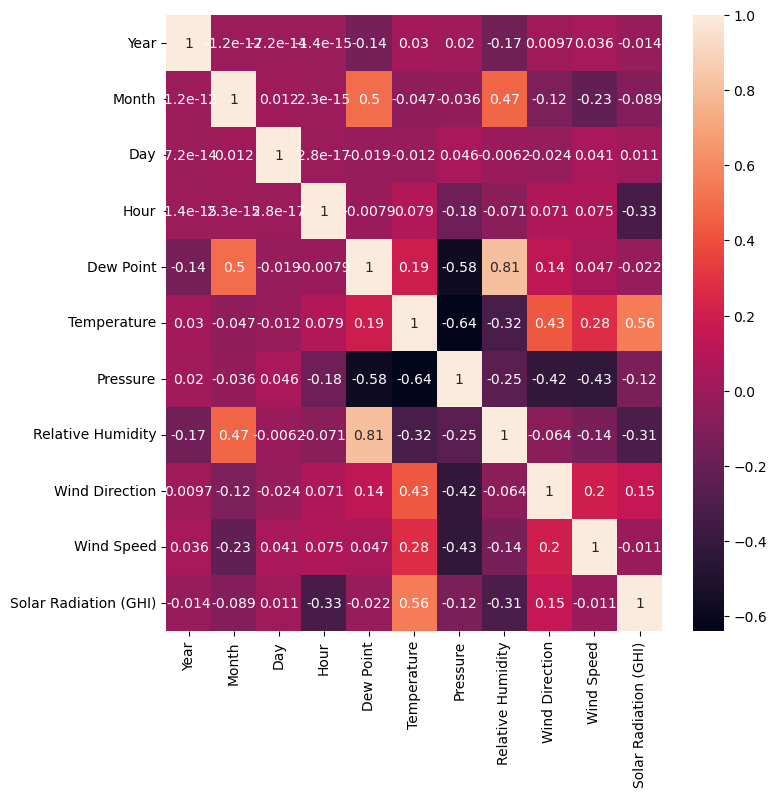

In [19]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # converting the scientific notation to decimal for quick scanning
plt.figure(figsize = (8,8))
sns.heatmap(data.corr(), annot = True)
plt.show()

# Feature Selection with ExtraTreeClassifier

In [20]:
from sklearn.ensemble import ExtraTreesClassifier
ET_Classifier = ExtraTreesClassifier()
ET_Classifier.fit(x,y)

ExtraTreesClassifier()

In [21]:
data.head()

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
7,2011,1,1,7,2,9.036,987.039,64.035,105.198,1.615,0
8,2011,1,1,8,3,12.158,987.897,55.106,113.318,1.439,159
9,2011,1,1,9,3,14.965,988.212,47.167,117.328,1.063,363
10,2011,1,1,10,3,18.956,988.055,36.747,72.488,0.546,533
11,2011,1,1,11,2,21.354,987.464,29.157,12.977,0.980,649


In [22]:
variables = ['Year', 'Month', 'Day', 'Hour', 'Dew Point', 'Temperature', 'Pressure', 'Relative Humidity', 'Wind Direction',
            'Wind Speed']

In [23]:
feature_imp = pd.Series(ET_Classifier.feature_importances_, index = variables)
feature_imp

Year                0.027
Month               0.044
Day                 0.108
Hour                0.141
Dew Point           0.087
Temperature         0.129
Pressure            0.119
Relative Humidity   0.119
Wind Direction      0.113
Wind Speed          0.114
dtype: float64

From above, Year and Month seem to be least important and following is a visualization 

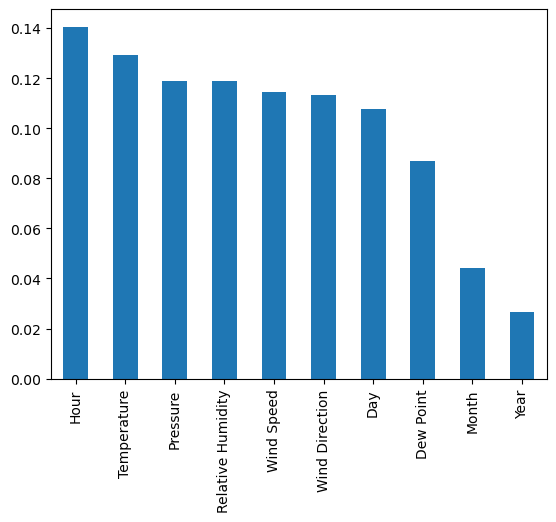

In [24]:
feature_imp.nlargest(10).plot(kind = 'bar')
plt.show()

# Doing the same with SelectKBest

In [25]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [26]:
k_best_classifier = SelectKBest(score_func = chi2, k =10)

In [27]:
best_features = k_best_classifier.fit(x, y)

In [28]:
best_features

SelectKBest(score_func=<function chi2 at 0x0000028AC83CADE0>)

In [29]:
scores = pd.DataFrame(best_features.scores_) # getting scores and columns as dataFrames
columns = pd.DataFrame(variables)

In [30]:
best_score = pd.concat([columns, scores], axis = 1) # concatenating two dataframes 

In [31]:
best_score

,0,0
0,Year,501.456
1,Month,239.256
2,Day,211.069
3,Hour,722.872
4,Dew Point,70.044
5,Temperature,251.385
6,Pressure,172.540
7,Relative Humidity,351.050
8,Wind Direction,200.669
9,Wind Speed,140.505


In [32]:
# renaming columns to 'Features and 'Scores' to scores

best_score.columns = ['Features', 'Scores']

In [33]:
best_score

,Features,Scores
0,Year,501.456
1,Month,239.256
2,Day,211.069
3,Hour,722.872
4,Dew Point,70.044
5,Temperature,251.385
6,Pressure,172.540
7,Relative Humidity,351.050
8,Wind Direction,200.669
9,Wind Speed,140.505


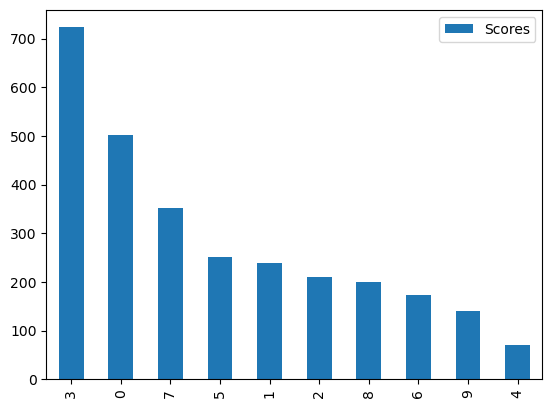

In [36]:
best_score.nlargest(10, 'Scores').plot(kind = 'bar')
plt.show()

The visualization above shows that the SelectKBest did a lot better at Feature Selection than ExtraTreesClassifier